# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="Régression-logistique-1" href="#Régression-logistique"><span class="toc-item-num">1&nbsp;&nbsp;</span>Régression logistique</a></div><div class="lev2 toc-item"><a data-toc-modified-id="La-sigmoïde,-la-fonction-logit-11" href="#La-sigmoïde,-la-fonction-logit"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>La sigmoïde, la fonction logit</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Principe-12" href="#Principe"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Principe</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Le-rapport-des-chances-121" href="#Le-rapport-des-chances"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Le rapport des chances</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Hypothèse-fondamentale-122" href="#Hypothèse-fondamentale"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Hypothèse fondamentale</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Estimation-des-paramètres-123" href="#Estimation-des-paramètres"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Estimation des paramètres</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Un-exemple---taille-et-poids-13" href="#Un-exemple---taille-et-poids"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Un exemple - taille et poids</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Régression-logistique-pour-plusieurs-variables-explicatives----principe-et-algo-14" href="#Régression-logistique-pour-plusieurs-variables-explicatives----principe-et-algo"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Régression logistique pour plusieurs variables explicatives -- principe et algo</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Disproportion-des-effectifs,-redressement-141" href="#Disproportion-des-effectifs,-redressement"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Disproportion des effectifs, redressement</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Défaut-bancaire-142" href="#Défaut-bancaire"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Défaut bancaire</a></div><div class="lev3 toc-item"><a data-toc-modified-id="Evaluation-des-performances,-matrice-de-confusion-143" href="#Evaluation-des-performances,-matrice-de-confusion"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Evaluation des performances, matrice de confusion</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Fin...-mais-ce-n'est-qu'un-début-15" href="#Fin...-mais-ce-n'est-qu'un-début"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fin... mais ce n'est qu'un début</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Références-16" href="#Références"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Références</a></div>

In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Loading customized Javascript for LaTeX typesetting
Running js_addon


/usr/lib/python3/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>

... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
Overriding run-range javascript function


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd

# Régression logistique

La régression logistique est une technique de classification très employée et performante. On décrit dans ces  notes les principes sous-jacent, l'utilisation de la technique avec Python/sklearn ou python/statmodels, l'évaluation des performances. 

Vous pourrez récupérer les données utilisées dans ce chapitre en suivant [ce lien](http://perso.esiee.fr/~bercherj/IT3007-2016/cours_logreg.zip). 

## La sigmoïde, la fonction logit

La régression logistique utilise la fonction [sigmoïde](http://fr.wikipedia.org/wiki/Sigmo%C3%AFde_(math%C3%A9matiques), qui fait elle-même partie des fonctions [logistiques](http://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst). La sigmoïde est donnée par :
$$
s(x) = \frac{1}{1+\exp(-x)}. 
$$
Son inverse est la fonction logit donnée par 
$$
l(t)= \log \frac{t}{1-t}.
$$
La fonction logistique est également la fonction de répartition de la loi logistique. \footnote{Cette dernière ressemble à une gaussienne. Dès qu'on s'intéresse à des effectifs cumulés, il y a donc des chances que la variable correspondante ressemble à une sigmoïde. C'est vraisemblablement l'explication des résultats obtenus pour le premier exemple de [cette référence](http://ww2.coastal.edu/kingw/statistics/R-tutorials/logistic.html). }

Ci-dessous la représentation de la sigmoïde, composée avec une fonction affine $\beta_0+\beta_1 x$ : 
$$
\frac{1}{1+\exp{\left(-\beta_0-\beta_1 x\right)} }.
$$
Il est facile de voir que la sigmoïde est toujours comprise entre 0 et 1. Lorsque l'argument est très positif, $\exp(-x)\rightarrow0$ et $s(x)\rightarrow1$. Similairement, pour $x\ll0$,  $\exp(-x)\rightarrow+\infty$ et $s(x)\rightarrow0$.

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def plot_sigmoid_lin(beta0, beta1, x):
    plt.plot(x, sigmoid(beta0 + beta1 * x))


x = np.linspace(-6, 6, 1000)
interact(plot_sigmoid_lin, beta0=[0.1, -2, 2], beta1=[1, 2, 4, -4], x=fixed(x));

interactive(children=(Dropdown(description='beta0', options=(0.1, -2, 2), value=0.1), Dropdown(description='beta1', options=(1, 2, 4, -4), value=1), Output()), _dom_classes=('widget-interact',))

On examine le comportement en fonction des deux paramètres :

-  modifier $\beta_0$ entraîne une translation sur l'axe des abscisses. Translation vers les $x<0$ pour $\beta_0>0$ et vers les $x>0$ pour $\beta_0<0$
- plus $\beta_1$ est grand, plus le passage de 0 à 1 est raide. Pour un $\beta_1<0$, on vérifiera que le sens de variation s'inverse. 

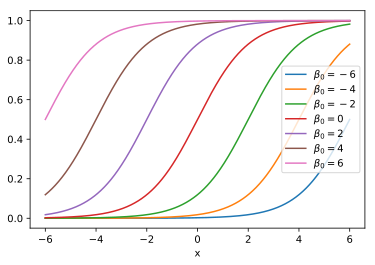

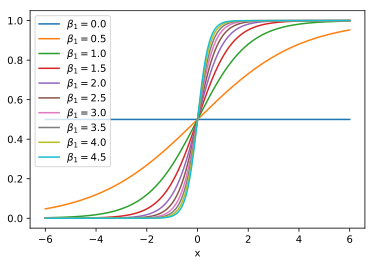

In [4]:
x = np.linspace(-6, 6, 1000)
beta1 = 1
for beta0 in range(-6, 7, 2):
    plt.plot(
        x, sigmoid(beta0 + beta1 * x), label="$\\beta_0={}$".format(beta0))
plt.xlabel('x')
#plt.text(-5,0.8,"$\\frac{1}{1+\\exp{-\\beta_0-\\beta_1 x}}$",fontsize=16)
plt.legend(loc='best')
#
plt.figure()
#
beta0 = 0
beta1 = 1
for beta1 in arange(0, 5, 0.5):
    plt.plot(
        x, sigmoid(beta0 + beta1 * x), label="$\\beta_1={}$".format(beta1))
plt.xlabel('x')
plt.legend(loc='best');

## Principe

### Le rapport des chances

Le rapport des chances, ou *odd ratio* est le rapport des probabilités de deux hypothèses. Comme classiquement on note $Y$ la réponse, ou variable expliquée (ou à prédire), et $X_i$ les variables explicatives. Pour le moment, on ne prendra qu'une seule variable explicative $X$. La variable à prédire $Y$ prend ses valeurs dans un alphabet fini. Ex: {0,1}, {Noir, Blanc}, {Rouge, Vert, Bleu}, {un petit peu, beaucoup, passionnément, pas du tout}, {très malade, malade, pas malade}. Pour le moment, on considèrera des variables à deux états. Le *odd ratio* est défini par 
$\def\Pr#1{\text{Pr}\left\{#1\right\}}$
$$
\eqboxc{
\text{odd}(x) = \frac{\Pr{Y=1|X=x}}{\Pr{Y=0|X=x} } = \frac{\Pr{Y=1|X=x}}{1-\Pr{Y=1|X=x} }
}
$$
Souvent, on s'intéresse au logarithme de ce rapport.  
Si $\Pr{Y=1|X=x}>\Pr{Y=0|X=x}$, alors $\log(\text{odd}(x))>0$ et réciproquement. Bien entendu, si on doit faire de la classification, **on décidera** $Y=1$ si $\Pr{Y=1|X=x}>\Pr{Y=0|X=x}$ ou de manière équivalente si $\log(\text{odd}(x))>0$. Tout le problème va donc être de déterminer $\Pr{Y=1|X=x}$. Dans la suite, on notera 
$$
\eqboxb{
\pi(x)=\Pr{Y=1|X=x}.}
$$

### Hypothèse fondamentale

L'hypothèse fondamentale est de supposer une forme polynomiale pour $\log(\text{odd}(x))$, par exemple affine
$$
\log(\text{odd}(x)) =\log\left( \frac{\pi(x)}{1-\pi(x)}\right) = \beta_0 + \beta_1 x. 
$$
Notons que la **décision** $Y=1$ correspondra alors simplement à tester $\beta_0 + \beta_1 x>0$, ce qui est quand même très simple. 

Comme la sigmoïde est la fonction inverse de $\log(\text{odd}(x))=\text{logit}(\pi(x))$, il vient
$$
\pi(x) = s(\beta_0 + \beta_1 x) = \frac{1}{1+\exp(-\beta_0 - \beta_1 x)}.
$$
Et il faut noter que la transformation transforme bien l'axe des $x$ en l'intervalle $[0,1]$. $\pi(x)$ est bien une probabilité. 

### Estimation des paramètres

Comment fait-on pour estimer $\pi(x)$ ?
On dispose d'un échantillon d'une suite de couples \textem{indépendants} $\{Y_i,x_i\}$ pour $i=0 \ldots (n-1)$. La probabilité de cet échantillon, les $x_i$ étant connus, est la vraisemblance
\begin{align}
\Pr{Y_0\ldots Y_{n-1}|x_0, x_1, \ldots x_{n-1}} & =\Pi_{i=0}^{n-1} \Pr{Y_{i}|x_i} \\
& = \Pi_{i=0}^{n-1} \Pr{Y_{i}=1|x_i}^{Y_i}\Pr{Y_{i}=0|x_i}^{1-Y_i}  
\end{align}
Les deux probas sont respectivement $\pi(x)$ et $(1-\pi(x))$. La technique habituelle du maximum de vraisemblance consiste à rechercher les paramètres, ici $\beta_0$ et $\beta_1$ afin que cette vraisemblance soit **maximale**.  Il n'existe pas de solution explicite à ce problème, et on ne peut qu'obtenir une solution numérique. 

En passant à l'opposé du logarithme, on obtient
\begin{align}
 -\log \Pr{Y_0\ldots Y_{n-1}|x_0, x_1, \ldots x_{n-1}} & = -\sum_{i=0}^{n-1} Y_i \log \pi(x) +({1-Y_i}) \log(1-\pi(x)). 
\end{align}
Et là, ce qui est beau, c'est que les deux termes en $-\log \pi(x)$ et $-\log(1- \pi(x))$ sont convexes en $\beta$ (calculez les dérivées secondes pour vous en convaincre). Ainsi l'opposé de la log-vraisemblance sera également une fonction convexe, comportant un unique minimum. Il n'y a plus qu'à utiliser un algorithme d'optimisation itératif pour trouver ce minimum. 

Typiquement, on pourra utiliser un algorithme de type algorithme du gradient, qui fonctionne en itérant
$$
\beta_k^{(n+1)} = \beta_k^{(n)}  - \mu \left. \frac{\partial}{\partial\beta_k} l(\beta)\right|_{\beta_k=\beta_k^{(n)}}
$$
où $l(\beta)$ est l'opposé de la log-vraisemblance. Dans notre cas, on peut vérifier que le terme de gradient vaut
$$
\frac{\partial}{\partial\beta_k} l(\beta)= -\sum_i (Y_i-\pi(x_i))x_i^{(k)}
$$
où $x_i^{(k)}$ vaut 1 pour $k=0$ (estimation de $\beta_0$) et $x_i^{(1)}=x_i$ (estimation de $\beta_1$). On entrevoir ici qu'il serait efficace d'introduire un vecteur $x_i$ dont les composantes seraient 1, $x_i$, etc ; ce qui se prètera à la génaralisation à plusieurs variables explicatives. 

D'autres types d'algorithmes, gradient conjugué, algos du second ordre, peuvent être employés. Ce qui nous importe ici, c'est que la solution est unique et garantie.  

## Un exemple - taille et poids

Les données peuvent être obtenues [ici](https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv)

In [5]:
heights_and_weights = pd.read_csv("01_heights_weights_genders.csv")

Le tableau initial se présente comme suit :

In [6]:
heights_and_weights.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


On commence par appliquer un certain nombre detransformations pour :
 - convertir le genre en une variable binaire (une variable numérique est nécessaire pour le module `statmodels` que l'on va employer dans la suite -- ce n'est pas nécessaire pour `sklearn`),
 - les données sont anglo-saxonnes, en tailles en pouces et poids en livres. On convertit en unités métriques,  ce sera plus agréable.
 
Pour ce faire, on utilise les méthodes `map` et  `apply`. Vous n'avez pas besoin de retenir ça. 

In [7]:
heights_and_weights['Male'] = heights_and_weights['Gender'].map({
    'Male': 1,
    'Female': 0
})
heights_and_weights['H (cm)'] = heights_and_weights['Height'].apply(
    lambda x: x * 2.54)
heights_and_weights['W (kg)'] = heights_and_weights['Weight'].apply(
    lambda x: x / 2.205)

In [8]:
heights_and_weights['Hcm'] = heights_and_weights['Height'].apply(
    lambda x: x * 2.54)
heights_and_weights['Wkg'] = heights_and_weights['Weight'].apply(
    lambda x: x / 2.205)

In [9]:
heights_and_weights.head()

,Gender,Height,Weight,Male,H (cm),W (kg),Hcm,Wkg
0,Male,73.847017,241.893563,1,187.571423,109.702296,187.571423,109.702296
1,Male,68.781904,162.310473,1,174.706036,73.610192,174.706036,73.610192
2,Male,74.110105,212.740856,1,188.239668,96.481114,188.239668,96.481114
3,Male,71.730978,220.042470,1,182.196685,99.792504,182.196685,99.792504
4,Male,69.881796,206.349801,1,177.499761,93.582676,177.499761,93.582676


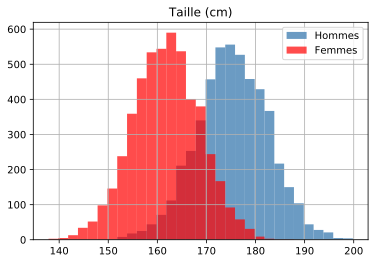

In [52]:
# 2cm bins
h = heights_and_weights['H (cm)']
male = heights_and_weights['Gender'] == 'Male'
bins1 = np.arange(h.min(), h.max(), 2.)
h[male].hist(bins=bins1, fc='steelblue', label="Hommes", alpha=0.8)
h[~male].hist(bins=bins1, fc='red', label="Femmes", alpha=0.7)
plt.set_xlabel = "Taille (cm)"
plt.title("Taille (cm)")
_ = plt.legend()

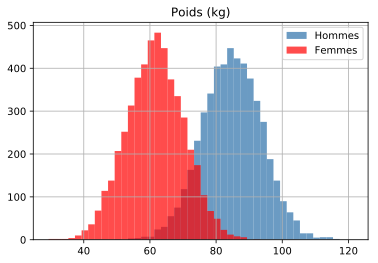

In [53]:
# 2kg bins
w = heights_and_weights['W (kg)']
male = heights_and_weights['Gender'] == 'Male'
bins1 = np.arange(w.min(), w.max(), 2.)
w[male].hist(bins=bins1, fc='steelblue', label="Hommes", alpha=0.8)
w[~male].hist(bins=bins1, fc='red', label="Femmes", alpha=0.7)
plt.set_xlabel = "Poids (kg)"
plt.title("Poids (kg)")
plt.legend();

Pour effectuer la régression logistique, on importe le module `sklearn` et la classe `LogisticRegression`. On instancie et on apprend le modèle via la méthode `fit`, qui attend les variables explicatives (les $x$) et la réponse à expliquer $y$ (la réponse). 

In [12]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
#

classifier = LogisticRegression()
features = heights_and_weights[['H (cm)']]
target = heights_and_weights['Gender']
# Apprentissage sur toute la base
classifier.fit(features, target)

/home/romanegr/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
print("L'intercept identifié", classifier.intercept_)
intercept = classifier.intercept_
print("Les coefficients : ", classifier.coef_[0])
coeffs = classifier.coef_[0]

L'intercept identifié [-29.36582432]
Les coefficients :  [0.17437448]


La fonction affine identifiée est ainsi 
$$
\beta_0 + \beta_1 x
$$
avec $\beta_0=-29.36$ et $\beta_1=0.1743$. Comme la clasification est effectuée selon que $\beta_0 + \beta_1 x$ soit positif ou non, on voit qu'il s'agit simplement de comparer les données à un seuil :
$$
x > \frac{-\beta_0}{\beta_1}
$$
qui vaut ici 168.406.

In [14]:
seuil = -intercept / coeffs
seuil

array([168.40666472])

On peut dès lors tracer à la fois la répartition des membres des deux classes et la sigmoïde correspondante, qui figure la probabilité attachée à chaque point (ici pour chaque taille). 

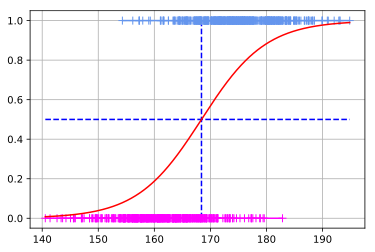

In [15]:
with_sigmoid = True
#
fig, ax = plt.subplots()
x1 = h[male][:500]
x2 = h[~male][:500]
ax.plot(
    x1, 1 * np.ones(x1.shape), color="cornflowerblue", marker='+',
    ms=8)  # rug plot
ax.plot(
    x2, 0 * np.ones(x2.shape), color="fuchsia", marker='+', ms=8)  # rug plot
if with_sigmoid:
    x = np.linspace(x2.min(), x1.max(), 1000)
    ax.plot(x, sigmoid(intercept + coeffs * x), 'r')
    ax.grid(b=True)
    ax.hlines(
        y=0.5, xmin=x2.min(), xmax=x1.max(), linestyle="dashed", color="blue")
    ax.vlines(x=seuil, ymin=0, ymax=1, linestyle="dashed", color="blue")

On peut ainsi faire correspondre à chaque $x$ (la taille) une probabilité ; et suivant que la probabilité est plus grande ou inférieure à 0.5, on affectera à l'une des classes. 

Par exemple, pour x=160, on lit une probabilité de 0.2. Pour x=180, on lit une proba de 0.9. Celà correspond directement aux valeurs données par la sigmoïde

In [16]:
x=160
print("Proba pour x={}: {:2.3}".format(x,(sigmoid(intercept+coeffs*x)[0])))
#
x=180
print("Proba pour x={}: {:2.3}".format(x,(sigmoid(intercept+coeffs*x)[0])))

Proba pour x=160: 0.188
Proba pour x=180: 0.883


On a aussi deux méthodes, qui permettent de déterminer la classe d'affectation et les probabs correpondantes : `predict()` et `predict_proba()`:

In [17]:
x = 160
print("Classe prédite", classifier.predict(x))
print("Probas correspondantes ", classifier.predict_proba(x))

Classe prédite ['Female']
Probas correspondantes  [[0.81243459 0.18756541]]


Sur la figure précédente, on observe qu'il y a un certain nombre de valeurs qui seront classées incorrectement. Il est facile de les dénombrer

In [18]:
seuil = float(seuil)
nb_incorrect = np.count_nonzero(h[male] < seuil)+ \
np.count_nonzero(h[~male] > seuil)
taux_erreur = nb_incorrect / np.size(h)
print("Nombre d'éléments incorrectement classés", nb_incorrect)
print("Taux d'erreur", taux_erreur)
print("Score", 1 - taux_erreur)

Nombre d'éléments incorrectement classés 1679
Taux d'erreur 0.1679
Score 0.8321000000000001


Bien entendu, il y a une méthode qui le fait directement

In [19]:
classifier.score(features,target)

0.8321

Normalement, il ne faut pas faire comme cela, mais apprendre le modèle et le tester sur deux bases séparées. La commande `train_test_split` nous fournit les bases séparées en sélectionnant un quart des données pour la base de test. Ici cela ne change pas grand chose sur les résultats, mais cela peut être drastique. 

In [20]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target)
classifier.fit(features_train, target_train)
score = classifier.score(features_test, target_test)
print("Score sur un base de test : ", score)
#predictions = classifier.predict(features_test)
#print (confusion_matrix(predictions, target_test))

Score sur un base de test :  0.84


## Régression logistique pour plusieurs variables explicatives -- principe et algo

Il faut bien reconnaître que le traitement de l'exemple est assez fruste. On distingue le genre uniqement à partir de la taille des individus. Il est clair que l'on devrait ajouter d'autres variables explicatives. La régression logistique peut prendre en compte plus de variables explicatives, il suffit de les spécifier. On recherchera simplement une **combinaison linéaire** (c'est pour celà que la régression logistique fait partie des modèles linéaires) des variables explicatives qui permette de modéliser au mieux la probabilité d'appartenance aux classes. Ainsi, on suppose que 
$$
\log(\text{odd}(x)) =\log\left( \frac{\pi(x)}{1-\pi(x)}\right) = \beta_0 + \beta_1 x_1 + \ldots \beta_p x_p = \sum_{k=0}^{p} \beta_k x_k. 
$$
L'algorithme  d'optimisation permettant de calculer les $\beta_k$ a la même forme que celle indiquée précedemment, la formule correspondante étant
$$
\beta^{(n+1)} = \beta^{(n)}  - \mu \left. \frac{\partial}{\partial\beta} l(\beta)\right|_{\beta=\beta^{(n)}}
$$
avec 
$$
\frac{\partial}{\partial\beta_k} l(\beta)= -\sum_i (Y_i-\pi(x_i))x_i
$$
et où $\beta=[\beta_0, \beta_1 \ldots \beta_p]^T$ et $x_i=[1, x_1(i), \ldots x_p(i)]^T$ sont deux vecteurs de taille $p+1$. Classiquement on prend $x_0$, qui correspond au paramètre $\beta_0$, à $x_0=1$ .

Il est donc très simple d'intégrer plus de variables explicatives. Faisons le ici en intégrant le poids : 

In [56]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
#

classifier = LogisticRegression()
features = heights_and_weights[['H (cm)', 'W (kg)']]
target = heights_and_weights['Male']
# 
features_train, features_test, target_train, target_test = train_test_split(
    features, target)

# Apprentissage surla base d'apprentissage
classifier.fit(features_train, target_train)
score = classifier.score(features_test, target_test)
print("Score sur la base de test : ", score)

Score sur la base de test :  0.9128


Le score est donc sensiblement augmenté. Il est utile de raffiner le modèle !

In [57]:
print("L'intercept identifié", classifier.intercept_)
intercept = classifier.intercept_
print("Les coefficients : ", classifier.coef_[0])
coeffs = classifier.coef_[0]

L'intercept identifié [-0.00342561]
Les coefficients :  [-0.18862093  0.43544604]


La fonction de séparation est cette fois-ci 
$$
\beta_0 + \beta_1*\text{taille} + \beta_2*\text{poids}
$$
On peut donc tracer la droite $\text{poids}=-\beta_0/\beta_2 - \beta_1/\beta_2*\text{taille}$ dans le plan (taille, poids) et comparer aux données répertoriées

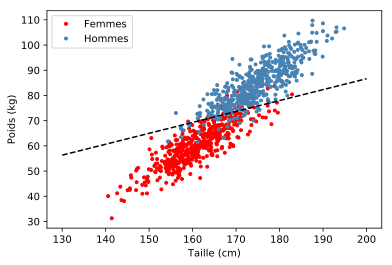

In [58]:
d0 = -intercept / coeffs[1]
d1 = -coeffs[0] / coeffs[1]

import matplotlib.pyplot as plt
#fig = plt.figure(figsize = (8, 6))
# Women points (pink)
plt.plot(
    h[~male][:500],
    w[~male][:500],
    '.',
    label='Femmes',
    color='red',
    alpha=.86)
# Men points (blue)
plt.plot(
    h[male][:500],
    w[male][:500],
    '.',
    label='Hommes',
    color='steelblue',
    alpha=.6)
# The separating line
plt.plot(array([130, 200]), d0 + d1 * array([130, 200]), '--', color="black")
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
_ = plt.legend(loc='upper left')

Comme précédemment, il est possible de prédire une classe avec la probabilité correspondante :

In [24]:
taille, poids = 160, 49.6
test = np.array([taille, poids]).reshape(1, -1)
c = classifier.predict(test)
p = classifier.predict_proba(test)
f = lambda x, p: ("Femme", float(p[0][0])) if x == 0 else ("Homme", float(p[0][1]))
print("La classe prédicte est {}, avec une proba {:1.4}".format(
    f(c, p)[0], f(c, p)[1]))

La classe prédicte est Femme, avec une proba 0.9998


On peut essayer d'ajouter d'autres variables explicatives pour essayer d'améliorer le modèle. Compte tenu du score très important réalisé ici avec seulement deux variables, c'est un peu peine perdue. 

In [59]:
# On ajoute des features
heights_and_weights['H2'] = heights_and_weights['H (cm)'].apply(
    lambda x: (x / 100)**2)
heights_and_weights['W2'] = heights_and_weights['W (kg)'].apply(
    lambda x: (x)**2)
heights_and_weights['IMC'] = heights_and_weights[['H (cm)', 'W (kg)']].apply(
    lambda x: (x[1] / ((x[0] / 100)**2)), axis=1)

classifier = LogisticRegression()
Score_test = []
Score_train = []

for test_number in range(50):

    features = heights_and_weights[['H (cm)', 'W (kg)', 'IMC', 'W2']]
    target = heights_and_weights['Gender']
    # 
    features_train, features_test, target_train, target_test = train_test_split(
        features, target)

    # Apprentissage surla base d'apprentissage
    classifier.fit(features_train, target_train)
    score_train = classifier.score(features_train, target_train)
    score_test = classifier.score(features_test, target_test)
    #print("Score sur la base de test : ",score)
    Score_test.append(score_test)
    Score_train.append(score_train)
print('test', np.mean(Score_test))
print('train', np.mean(Score_train))

test 0.9175200000000001
train 0.9190213333333334


In [26]:
heights_and_weights.head()

,Gender,Height,Weight,Male,H (cm),W (kg),Hcm,Wkg,H2,W2,IMC
0,Male,73.847017,241.893563,1,187.571423,109.702296,187.571423,109.702296,3.518304,12034.593797,31.180449
1,Male,68.781904,162.310473,1,174.706036,73.610192,174.706036,73.610192,3.052220,5418.460310,24.116936
2,Male,74.110105,212.740856,1,188.239668,96.481114,188.239668,96.481114,3.543417,9308.605287,27.228268
3,Male,71.730978,220.042470,1,182.196685,99.792504,182.196685,99.792504,3.319563,9958.543763,30.061938
4,Male,69.881796,206.349801,1,177.499761,93.582676,177.499761,93.582676,3.150617,8757.717251,29.702972


In [27]:
features_train, features_test, target_train, target_test = train_test_split(features, target)
classifier.fit(features_train, target_train)
predictions = classifier.predict(features_test)
print (confusion_matrix(predictions, target_test))

[[1145   96]
 [  91 1168]]


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

heights_and_weights_mod = logit("Male ~ Hcm +Wkg + H2", heights_and_weights).fit()
print(heights_and_weights_mod.summary())

Optimization terminated successfully.
         Current function value: 0.208660
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Male   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                  0.6990
Time:                        10:05:54   Log-Likelihood:                -2086.6
converged:                       True   LL-Null:                       -6931.5
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.9470     21.209      3.109      0.002      24.379     107.515
Hcm           -0.9721      0.

### Disproportion des effectifs, redressement

Il arrive souvent que les données d'apprentissage soient issues d'un tirage *rétrospectif* où les proportions des deux classes ne sont pas celles de la population réelle. Par exemple si on étudie une caractéristique de très faible probabilité (gagner à un jeu télévisé, développer telle maladie), le nombre de cas positif est très faible, et la taille de l'échantillon représentatif devrait être très conséquent de manière à assurer un nombre suffisant d'observations des cas positifs (ex: p=0.001, si on veut 100 cas positifs, il faudrait une population de taille $\approx$ 100000 ). Dans ce cas, on prend souvent -- et parfois sans le dire, tous les cas positifs auquel on adjoint un certain nombre de contrôles négatifs par exemple 5 fois le nombre de positifs). Les proportions vont donc être différentes de celle de la population initiale et ceci a forcément des conséquences sur les paramètres du modèle, les seuils, etc. 

On se souvient que le rapport des chances est défini par 
$\def\Pr#1{\text{Pr}\left\{#1\right\}}$
$$
\text{odd}(x) = \frac{\Pr{Y=1|X=x}}{\Pr{Y=0|X=x} } = \frac{\Pr{Y=1|X=x}}{1-\Pr{Y=1|X=x} }
$$
On peut utiliser la règle de Bayes
$$
\Pr{Y=k|X=x} = \frac{\Pr{X=x|Y=k}\Pr{Y=k}}{\Pr{X=x}}
$$
qui mène donc à 
$$
\text{odd}(x) = \frac{\Pr{Y=1|X=x}}{\Pr{Y=0|X=x} } = \frac{\Pr{X=x|Y=1}}{\Pr{X=x|Y=0} }  \frac{\Pr{Y=1}}{\Pr{Y=0} }.
$$
En pratique, le rapport $\Pr{Y=1}/\Pr{Y=0}$ peut être estimé comme le rapport des nombres d'éléments dans chacune des classes. Les probabilités $\Pr{X=x|Y=k}$ quant-à-elle ne dépendent bien sûr pas du nombre d'éléments dans les classes. Ainsi, si on dispose d'un tirage *rétrospectif*, où on a modifié les nombres d'éléments dans chacune des classes, seul est modifié $\Pr{Y=1}/\Pr{Y=0}$.

 Notons $p_1=\Pr{Y=1}$ et $p_0=\Pr{Y=0}=1-p1$. 
 Notons encore $\tilde{p}_1$ la probabilité modifiée par 
 ré-échantillonnage. Soit $\widetilde{\text{odd}}(x)$ le ratio obtenu après ré-échantilonnage. Il est clair que l'on a alors 
$$
\log\left( {\text{odd}}(x)\right)   =  \log\left( \frac{p_1}{p_0}\right)
- \log\left( \frac{\tilde{p}_1}{\tilde{p}_0}\right)
+ \log\left( \widetilde{\text{odd}}(x)\right). 
$$
Par suite, puisque $\log\left( {\text{odd}}(x)\right)=\beta_0+\sum_{k=1}^p \beta_k x_k$, il vient
$$
\beta_0+\sum_{k=1}^p \beta_k x_k = \log\left( \frac{p_1}{p_0}\right)
- \log\left( \frac{\tilde{p}_1}{\tilde{p}_0}\right)+
\tilde{\beta}_0+\sum_{k=1}^p \tilde{\beta}_k x_k. 
$$
On en déduit que **seul $\beta_0$ est modifié** :
$$
\beta_0 = \tilde{\beta}_0 + \log\left( \frac{p_1}{p_0}\right)
- \log\left( \frac{\tilde{p}_1}{\tilde{p}_0}\right)+
$$
tandis que pour tous les autres ordres, on a $\tilde{\beta}_k= \beta_k$. 

Une conséquence de ceci est que si on travaille avec les données ré-échantillonées, et avec le modèle correspondant, alors il faut modifier le seuil : pour affecter à la classe positive, tester 
$$
\tilde{\beta}_0+\sum_{k=1}^p \tilde{\beta}_k x_k > \log\left( \frac{\tilde{p}_1}{\tilde{p}_0}\right)-\log\left( \frac{p_1}{p_0}\right)
$$
plutôt que par rapport à un seuil à 0. En ce qui concerne les probas, celà revient à comparer les probabilités à 
$$
\frac{1}{1+\frac{\tilde{p}_1}{p_1} \frac{p_0}{\tilde{p}_0} }
$$ plutôt qu'au seuil 0.5. 

### Défaut bancaire

On étudie des données bancaires donnant le montant des entrées mensuelles (*income*), le solde (*balance*), le statut d'étudiant, et un statut de défaut *default* (le solde est passé en négatif). Ce qui intéresse le banquier, c'est bien entendu de prévoir un défaut éventuel. 

In [29]:
Default = pd.read_csv("Default.csv")
# Le fichier est aussi disponible ici :
# pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)

In [30]:
Default.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365
9999,10000,No,Yes,200.922183,16862.952321


Pour mémoire, la cellule suivante fait cela en R. Vous pouvez éviter cela, sinon constater au passage qu'il faut avoir des codes pour comprendre de quoi il retourne... 

In [31]:
import rpy2
%load_ext rpy2.ipython 

In [32]:
%%R 
library("ISLR")
data(Default,package='ISLR')
#write.csv(Default,"default.csv")
glm.out=glm('default~balance+income+student', family=binomial, data=Default)
s=summary(glm.out)
print(s)
#
glm.probs=predict(glm.out,type="response") 
glm.probs[1:5]
glm.pred=ifelse(glm.probs>0.5,"Yes","No")
#attach(Default)
t=table(glm.pred,Default$default)
print(t)
score=mean(glm.pred==Default$default)
print(paste("score",score))


Call:
glm(formula = "default~balance+income+student", family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
studentYes  -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8

        
glm.pred   No  Yes
     No  9627  228
     Yes   40  105
[1] "score 0.9732"


On fait un petit travail de préparation, en binarisant les statuts. Ensuite on crée deux vues `b0` et  `b1` qui correspondent aux portions du tableau sans et avec défaut. 

In [60]:
Default = pd.read_csv("Default.csv")
#a= [1 if Default['default'][k]=='Yes' else 0 for k in range(len(Default['default'])) ]
Default['default'] = Default['default'].map({'No': 0, 'Yes': 1})
Default['student'] = Default['student'].map({'No': 0, 'Yes': 1})
#
I = Default['default'] == 0
b0 = Default[I]
b1 = Default[~I]
print("Nombre de valeurs de défaut :", Default[~I]['balance'].count())

Nombre de valeurs de défaut : 333


On représente les données en nuage, en fonction des deux classes à séparer.

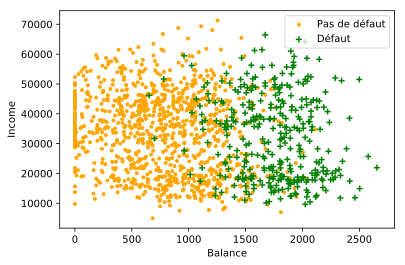

In [35]:
plt.scatter(
    x=b0['balance'][:1000],
    y=b0['income'][:1000],
    color='orange',
    marker='.',
    label="Pas de défaut")
plt.scatter(
    x=b1['balance'], y=b1['income'], color='green', marker='+', label="Défaut")
figcaption("Nuage de points des deux classes")
plt.xlabel("Balance")
_ = plt.ylabel("Income")
_ = plt.legend()

Sur ce graphique, on voit que c'est probablement la `balance` qui est la variable explicative la plus pertinente. Ceci est confirmé par l'examen des histogrammes

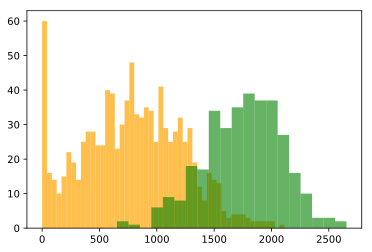

In [36]:
plt.hist(b0['balance'][:1000], 50, color='orange', alpha=0.7)
_ = plt.hist(np.array(b1['balance']), 20, color='green', alpha=0.6)
figcaption("Histogramme des deux classes en fonction du solde")
#plt.xlabel("Balance")

On effectue une régression logistique avec les outils de `sklearn`, comme précédemment. 

In [61]:
features = Default[[ 'balance', 'income' ]]
target = Default['default']
# 
features_train, features_test, target_train, target_test = train_test_split(features, target)

classifier = LogisticRegression(C=1000000, class_weight='balanced') 
#super important de mettre le paramètre balanced qui prend en 
#compte que les classes ne soient pas équilibrées, de plus C fixe le degré de régularisation
# C important, pas de régul.

# Apprentissage surla base d'apprentissage
classifier.fit(features, target,)
score_train=classifier.score(features_train,target_train)
score_test=classifier.score(features,target)
print("Score sur la base de test : ",score_test)
#print(score_train)
print(classifier.intercept_)
print(classifier.coef_)



Score sur la base de test :  0.8655
[-8.1539798]
[[5.67576159e-03 1.95270454e-05]]


In [62]:
from mycfm import *
y_true = target_test
y_pred_cls = classifier.predict_proba(features_test)[:, 1] > 0.5
mycfm(y_true, y_pred_cls)

Predicted  False  True   All
True                        
0           2090   331  2421
1              7    72    79
All         2097   403  2500

Score          0.865
Precision      0.179
Recall         0.911


Ci-dessous un exemple d'emploi du module `statmodels` qui permet d'obtenir des statistiques plus détaillées. Notamment, on y voit que la variable `income` n'est pas nécessairement pertinente. 

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols

#print(dta.head(10))
affair_mod = logit("default ~ balance + income + student ", Default).fit()
print(affair_mod.summary())
affair_mod.pred_table()


Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:              lun., 22 oct. 2018   Pseudo R-squ.:                  0.4619
Time:                        11:26:59   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0

array([[9627.,   40.],
       [ 228.,  105.]])

Que demander de plus ? Un  score de 87% ! 

Examinons graphiquement ce que cela donne. 

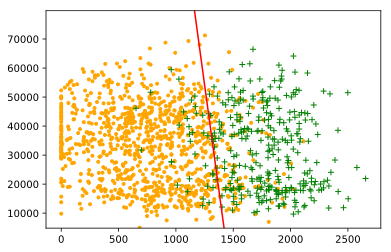

In [64]:
intercept=classifier.intercept_
coeffs=classifier.coef_[0]

d0=-intercept/coeffs[1]
d1=-coeffs[0]/coeffs[1]

plt.plot(b0['balance'][:1000], b0['income'][:1000],'.', color='orange',marker='.')
plt.plot(b1['balance'],b1['income'],'.', color='green', marker='+')

# The separating line
plt.plot(array([1100,1500]), 
         d0 + d1 * array([1100,1500]),'-',color="red")
_=plt.ylim([0.5*b1['income'].min(),1.2*b1['income'].max()])

Mais... Si on regarde bien. Dans la mesure où il y a uniquement 333 cas posititifs sur 10000, si on classait toutes les propositions à "pas de défaut", on obtiendrait un taux d'erreur de 333/1000 et un score de 1-333/10000 = 0.9667. Arg ! 

On peut donc faire bien mieux sans donner du mal. Mais le banquier, ce qui l'intéresse, c'est de savoir qui va faire défaut, pas de savoir que la plupart du temps tout va bien. Il faut donc changer la manière d'apprécier les résultats. 

La question est donc de comment évaluer la qualité des résultats, et peut-être, optimiser suivant certains critères. Une partie des réponses se trouve dans l'étude de la matrice de confusion. 

### Evaluation des performances, matrice de confusion

Par définition, la matrice de confusion $C$ est telle que $C_{i, j}$
représente le nombre d'observations dans la classe $i$ mais prédictes dans le groupe $j$.

In [42]:
pd.DataFrame(data=[['TN', 'FP'], ['FN','TP']], index=['True 0', 'True 1'],
            columns=['Predicted 0', 'Predicted 1'])


,Predicted 0,Predicted 1
True 0,TN,FP
True 1,FN,TP


Pour un tout petit exemple synthétique, cela donne

In [43]:
import pandas as pd
y_true = array([1, 1, 1, 1, 0, 0, 0, 0])
y_pred = array([1, 0, 0, 0, 0, 0, 0, 0])
CC=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(CC)
print()
C=confusion_matrix(y_true, y_pred,labels=[0,1])
print(C)

Predicted  0  1  All
True                
0          4  0    4
1          3  1    4
All        7  1    8

[[4 0]
 [3 1]]


Dans la [matrice de confusion](http://en.wikipedia.org/wiki/Confusion_matrix), on peut mesurer 

- (TP) true positive  : observations classées positives et qui le sont réellement.
- (TN) true negative  : : observations classées négatives et qui le sont réellement.
- (FP) false positive  [eqv. with false alarm, Type I error] classés positifs et qui sont réalité des négatifs.
- (FN) false negative  [eqv. with miss, Type II error]

A partir de là, on peut construire un certain nombre d'indicateurs. Les plus utilisés sont

- Le taux d'erreur est égal au nombre de mauvais classement sur l'effectif total
$$
e=\frac{FP+FN}{N}
$$
- Le score ou taux de succès (*accuracy*) correspond à la probabilité de bon classement
$$
score = \frac{TP+TN}{N}
$$
- La sensibilité (ou le rappel, *recall* ou true positive rate TPR) indique la capacité du modèle
à retrouver les positifs (proportion de positifs détectés)
$$
Se=recall=\frac{TP}{TP+FN}
$$
- La précision (*precision*) indique la proportion de vrais positifs parmi ceux qui ont été classés positifs
$$
precision = \frac{TP}{TP+FP}
$$
- La spécificité, à l'inverse de la sensibilité, indique la proportion de négatifs détectés
$$
Sp=\frac{TN}{TN+FP}
$$
Le *false positive rate* FPR est le compémentaire, $1-Sp$.

La matrice de confusion renvoyée par sklearn n'est vraiment pas jolie. Ci-dessous une petite fonction personnelle pour améliorer un peu les choses

In [44]:
#%%file mycfm.py
from IPython.display import HTML, display, display_html 
import numpy as np
import pandas as pd

def mycfm(y_true, y_pred):  
    """
    Rend une jolie matrice de confusion (cas binaire) et les principaux scores associés
    
    Arguments :
    -----------
    y_true: array
         les vraies classes
    y_pred: array
         les classes prédites 
    """
    CC=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    """try:
        display_html(CC)
    except:
        print(CC)
    """    
    print(CC)    
    C=np.array(CC)
    score=(C[0,0]+C[1,1])/(C[0,0]+C[1,1]+C[0,1]+C[1,0])
    precision=(C[1,1])/(C[1,1]+C[0 ,1])
    recall=(C[1,1])/(C[1,1]+C[1,0])
    print()
    print('{s:{c}<{n}}{num:2.3}'.format(s='Score',n=15,c='', num=score))
    print('{s:{c}<{n}}{num:2.3}'.format(s='Precision',n=15,c='', num=precision))
    print('{s:{c}<{n}}{num:2.3}'.format(s='Recall',n=15,c='', num=recall))

Pour notre classification, on obtient les performances suivantes :

In [68]:
y_true = target_test
y_pred_cls = classifier.predict_proba(
    features_test)[:, 1] > 0.7  # affectation des classes
mycfm(y_true, y_pred_cls)

Predicted  False  True   All
True                        
0           2238   183  2421
1             14    65    79
All         2252   248  2500

Score          0.921
Precision      0.262
Recall         0.823


Il est important de noter que les estimations de la sensibilité et de la spécificité à partir de la matrice de confusion restent valables lorsquon ré-échantillonne les données (on modifie les proportions), car justement ils ne dépendent pas des proportions relatives des deux classes.


La classification s'effectue en comparant la probabilité d'appartenance à une classe à un *seuil de décision*. Il est clair qu'en modifiant ce seuil, on aura des performances différentes. 

On construit ci-dessous une petite fonction qui permet d'évaluer les différents indicateurs. 

In [69]:
#%%file classif_eval.py
import numpy as np
import pandas as pd

def classif_eval(y_true,y_pred,nb_values=1000):
    """
    Evalue la qualité de la classification en calculant les les nombres de vrai et 
    faux positifs, de vrai et faux négatifs.
    input :
    -------
    y_true : array
        les vraies classes
    y_pred_proba : array
        les probabilités prédites pour chaque classe
    nb_values : int
        nombre de valeurs de seuils (sur les probas) pour calculer les affectations aux classes
    output :
    --------
    tp,fp,tn,fn,total_pos,total_neg
    """
    
    tp=np.zeros(nb_values)
    fp=np.zeros(nb_values)
    tn=np.zeros(nb_values)
    fn=np.zeros(nb_values)
    total_pos=np.sum(y_true)
    total_neg=np.size(y_true)-total_pos

    k=0
    for p in np.linspace(0,1,nb_values):
        tp[k]=np.sum((y_pred>p)*y_true)
        fp[k]=np.sum((y_pred>p)*(np.logical_not(y_true)))
        tn[k]=np.sum((y_pred<p)*(np.logical_not(y_true)))
        fn[k]=np.sum((y_pred<p)*(y_true))
        k+=1
    return tp,fp,tn,fn,total_pos,total_neg

Afin d'évaluer la qualité de la classification obtenue, on peut tracer les différents indicateurs, pour voir leurs interactions, et leur comportement en fonction du choix du seuil de décision. 

/home/romanegr/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


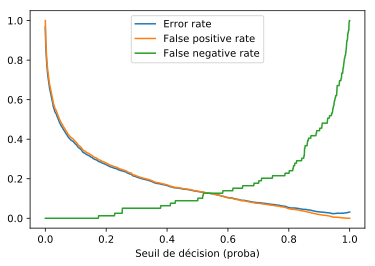

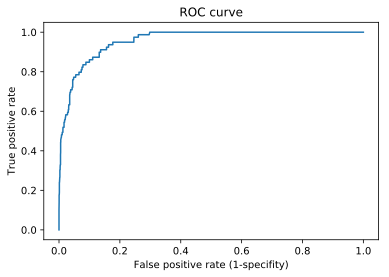

In [70]:
y_true = target_test
y_pred_cls = classifier.predict_proba(features_test)[:, 1]

tp, fp, tn, fn, total_pos, total_neg = classif_eval(
    y_true, y_pred_cls, nb_values=1000)
nb_values = len(tp)

plt.plot(
    np.linspace(0, 1, nb_values),
    1 - (tp + tn) / (total_pos + total_neg),
    label="Error rate")
#error rate
plt.plot(
    np.linspace(0, 1, nb_values), fp /
    (fp + tn), label="False positive rate")  #false positive rate
plt.plot(
    np.linspace(0, 1, nb_values), fn /
    (fn + tp), label="False negative rate")  #false negative rate 
plt.legend(loc='best')
plt.xlabel("Seuil de décision (proba)")
figcaption("Courbes de taux d'erreur")
plt.figure()
plt.title("ROC curve")
plt.plot(fp / (fp + tn), tp / total_pos)  #True positive/ False positive 
# (sensibility / 1 - specificity)
plt.xlabel("False positive rate (1-specifity)")
plt.ylabel("True positive rate")
figcaption("Courbe ROC")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


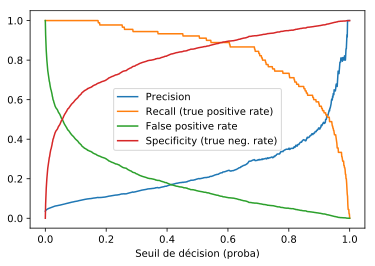

In [48]:
plt.plot(np.linspace(0, 1, nb_values), tp / (tp + fp), label="Precision")
#precision = positive predictive value
plt.plot(
    np.linspace(0, 1, nb_values),
    tp / (fn + tp),
    label="Recall (true positive rate)")
#recall  = true positive rate
plt.plot(
    np.linspace(0, 1, nb_values), fp / (fp + tn), label="False positive rate")
#false positive rate
plt.plot(
    np.linspace(0, 1, nb_values),
    tn / (fp + tn),
    label="Specificity (true neg. rate)")
#specificity
plt.xlabel("Seuil de décision (proba)")
_ = plt.legend(loc='best')
figcaption("Courbes précision/recall/spécificité")

Si on choisit un seuil à p=0.95, on obtient alors les performances suivantes :

In [72]:
y_true=target_test
y_pred_cls=classifier.predict_proba(features_test)[:,1]>0.92
mycfm(y_true, y_pred_cls)

Predicted  False  True   All
True                        
0           2386    35  2421
1             38    41    79
All         2424    76  2500

Score          0.971
Precision      0.539
Recall         0.519


Après, c'est bien entendu à l'ingénieur de présenter les résultats au banquier. Faut-il privilégier la précision (proportion de vrais positifs parmi ceux qui ont été détecté positifs), la sensibilité (recall) proportion des positifs détecté, ou le taux de faux positifs (FPR) ?

Pour mémoire, on notera que dans le module `sklearn`, on dispose aussi d'un certain nombre de méthodes pour tracer les paramètres pertinents : `precision_recall_curve, roc_curve`, et d'une méthode  `classification_report`. 

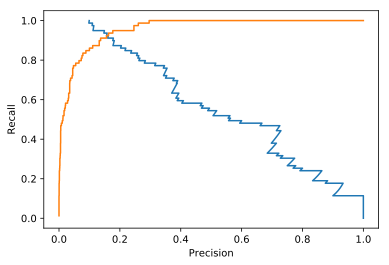

In [74]:
from sklearn.metrics import precision_recall_curve, roc_curve
y_pred=classifier.predict_proba(features_test)[:,1]
p,r,s=precision_recall_curve(y_true, y_pred)
plt.plot(p,r)
plt.xlabel("Precision")
plt.ylabel("Recall")
f,t,s=roc_curve(y_true,y_pred)
plt.plot(f,t)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(target_test,classifier.predict_proba(features_test)[:,1]>0.5, 
                      target_names=['pas de défaut', 'défaut']))

               precision    recall  f1-score   support

pas de défaut       1.00      0.86      0.92      2410
       défaut       0.20      0.92      0.33        90

  avg / total       0.97      0.86      0.90      2500



## Fin... mais ce n'est qu'un début

Il resterait bien des choses à aborder :

- comment faire du multi-classes (plusieurs classes plutôt que du binaire) ? -- c'est très simple,
- comment gérer des variables discrètes (prenant leur valeur dans plusieurs "catégories") ?
- comment choisir le nombre de variables explicatives, sélectionner les variables les plus pertinentes ?
- comment donner une confiance aux paramètres estimés ?
- comment évaluer la qualité des prédictions/classification sur de nouvelles mesures ?
- comment mettre en oeuvre des modèles prenant en compte des effets non-linéaires ? 




Un exemple supplémentaire amusant -- une histoire de tromperies :

- [version statsmodels](http://statsmodels.sourceforge.net/stable/examples/notebooks/generated/discrete_choice_example.html)
- [une étude avec le notebook ipython](http://nbviewer.ipython.org/github/justmarkham/gadsdc1/blob/master/logistic_assignment/kevin_logistic_sklearn.ipynb)

## Références

- Ricco Rakotomalala, [Pratique de la régression logistique](http://eric.univ-lyon2.fr/~ricco/cours/cours/pratique_regression_logistique.pdf), version 2.0, 2014 (disponible en ligne)
- James, G., Witten, D., Hastie, T., Tibshirani, R., [Introduction to Statistical Learning with applications in R](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Fourth%20Printing.pdf),  Springer Texts in Statistics, 2013. (disponible en ligne)
- [An introduction to logistic regression](http://www.appstate.edu/~whiteheadjc/service/logit/intro.htm)
- Hastie, T., Tibshirani, R., Introduction to Statistical Learning with applications in R, cours Stanford, 2015. 
- T.Hastie, R. Tibshirani, J.Friedman, The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Spinger, 2009.
